# Práctica 4 - Multiperceptrón

##Objetivos
El objetivo de esta práctica es comprender el funcionamiento del multiperceptrón.

##Temas

* Métricas: precision, recall, F1-Score
* Multiperceptrón

##Lectura
Material de Lectura: Capítulos 2 y 3 del libro Neural Networks and Deep Learning.

# Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

FUENTES_DIR = '/content/drive/MyDrive/DeepLearning-colab/Fuentes-20240901'
DATOS_DIR = '/content/drive/MyDrive/DeepLearning-colab/Datos-20240901'

import sys
sys.path.append(FUENTES_DIR)

Mounted at /content/drive/


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chardet
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay


# Parte 1 - Multiperceptrón con SciKit-Learn

# Ejercicio 1

Se entrenó una red neuronal multiperceptrón para resolver un problema de clasificación y al medir su desempeño sobre el conjunto de datos de entrenamiento se obtuvo la siguiente matriz de confusión:

|10|0|1|0|1|
|--|-|-|-|-|
|0|12|0|0|0|
|0|0|12|0|0|
|2|0|0|38|0|
|0|8|0|0|61|

<ol type='a'>
  <li> <strong>En base a esta información, indique:</strong></li>
  <ul type='*'>
  <li><strong>Cuántos ejemplos se utilizaron en el entrenamiento.</strong>

  <p>Es la cantidad total de ejemplos que contiene la matriz. Contando por columnas:
  <br> <strong>Total = </strong>12 + 20 + 13 + 39 + 62 = 146
  </p>
  </li>
  <li><strong>Cuántas clases puede reconocer este multiperceptrón.</strong>
  <p> Puede reconocer <strong>5 clases</strong>, que es la cantidad de columnas.</p>
  </li>
  <li><strong>Cuál es la precisión (accuracy) de la red sobre el conjunto de ejemplos completo.</strong>
  <p>El accuracy es la cantidad de ejemplos correctamente clasificados (diagonal) sobre el total de ejemplos:
  <br> <strong> Accuracy = </strong> 121/146 = 0.8288 * 100 = 82.88%
  </p>
  </li>
  <li><strong>Cuáles son los valores de precisión de la red al responder por cada uno de los valores de clase.</strong>

  <p> La precisión es la cantidad de predicciones correctas (elementos sobre la diagonal) sobre cantidad de incorrectas (fuera de la diagonal) por cada clase. Entonces: </p>
  <br><strong>Precisión c1 = </strong> 10/12 = 0.83
  <br><strong>Precisión c2 = </strong> 12/20 = 0.6
  <br><strong>Precisión c3 = </strong> 12/3 = 0.33
  <br><strong>Precisión c4 = </strong> 38/38 = 1
  <br><strong>Precisión c5 = </strong> 61/62 = 0.98
  <br>
  </li>
  <li><strong>Cuáles son los valores de sensibilidad de la red al responder por cada uno de los valores de clase (recall).</strong>
  <p>Son los ejemplos de una clase correctamente clasificados:
  <br><strong>Clase 1 = </strong> 10/12 = 0.83
  <br><strong>Clase 2 = </strong> 12/12 = 1
  <br><strong>Clase 3 = </strong> 12/12 = 1
  <br><strong>Clase 4 = </strong> 30/40 = 0.75
  <br><strong>Clase 5 = </strong> 61/69 = 0.88
  </p>
  </li>
  </ul>
  <li>Identifique la clase con el mejor valor de F1-score</li>
  <p><strong>F1 score:</strong> resume la precisión y sensibilidad en una sola métrica. Por ello es de gran utilidad cuando la distribución de las clases es desigual, por ejemplo cuando el número de elementos de una clase del 15% y el otro es 85%.
  
  Se calcula como: F1 = (2* precisión * sensibilidad)/ (precisión + sensibilidad)

  <br><strong>Clase 1 = </strong> (2*0.83*0.83)/(0.83+0.83) = 0.83
  <br><strong>Clase 2 = </strong> (2*0.6*1)/(0.6+1) = 0.75
  <br><strong>Clase 3 = </strong> (2*0.33*1)/(0.33+1) = 0.49
  <br><strong>Clase 4 = </strong> (2*1*0.75)/(0.75+1) = 0.85
  <br><strong>Clase 5 = </strong> (2*0.6*1)/(0.6+1) = 0.75
  
  La clase 4 tiene el mejor valor de F1
  </p>
  
</ol>

# Ejercicio 2

Se desea utilizar una red multiperceptrón para reconocer muestras de tres variedades diferentes de trigo: Kama, Rosa y Canadiense. Para entrenarla se utilizará una parte de los ejemplos del archivo **SEMILLAS.CSV.**

Fuente de datos: Seeds Data Set - https://archive.ics.uci.edu/ml/datasets/seeds

<ol type='a'>
<li>Con respecto a la arquitectura, indique:
<ul>
<li>La cantidad de neuronas de la capa de entrada.
<br> <strong>Respuesta:</strong>Es la cantidad de atributos a ingresar a la red: 7
</li>
<li>La cantidad de neuronas de la capa de salida.
<br><strong>Respuesta:</strong> Es la cantidad de valores diferentes que tiene la variable target: 3
</li>
<li>La cantidad de pesos (arcos) que tiene la red si se utiliza una única capa oculta formada por 4 neuronas.
<br><strong>Respuesta:</strong> Serían 4 neuronas de la capa oculta, cada una conectada a cada neurona de la capa de entrada y a la capa de salida:
<br>7 atributos * 4 neuronas de la capa oculta + 4 neuronas de la capa oculta * 3 neuronas de la capa de salida
<br>= 7*4+4*3
<br>= 28+12
<br>= 40 arcos
</ul>
</li>
<li>La arquitectura del multiperceptrón utilizado para predecir los 3 tipos de semillas está formada por 3 capas: la capa de entrada, una única capa oculta de 4 neuronas y la capa de salida. Las funciones de activación para las capas oculta y de salida son “tanh” y “sigmoid” respectivamente. Indique cuáles de los siguientes factores inciden en la dirección de cambio (signo de la modificación) de los pesos de la red:
<ul>
<li>El error cometido en la predicción.</li>
<li>El valor de la derivada de la función de activación.</li>
<li>Los valores anteriores de los pesos de la red.</li>
</ul>
</li>
<li>Luego de ingresar una muestra de semilla a la red se obtiene como salida (0.78, 0, 0). Utilizando la arquitectura descripta en b), indique cuántos pesos de la red serán modificados sabiendo que la respuesta esperada es (1, 0, 0).</li>
</ol>


In [ ]:
semillas = pd.read_csv('/content/drive/MyDrive/DeepLearning-colab/Datos-20240901/Semillas.csv')

In [ ]:
semillas.head()

,Area,Perimetro,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco,Clase
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Tipo1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Tipo1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Tipo1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Tipo1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Tipo1


In [ ]:
target = 'Clase'
atributos = semillas.drop(columns=target).columns
print(f'Cantidad de atributos a ingresar a la red: {len(atributos)}')

Cantidad de atributos a ingresar a la red: 7


In [ ]:
clases = semillas[target].unique()
print(f'Cantidad de neuronas de salida: {len(clases)}')

Cantidad de neuronas de salida: 3


# Ejercicio 3

El archivo Vinos.csv tiene información referida a 13 características químicas y/o visuales de varias muestras de vinos pertenecientes a 3 clases distintas.
Utilice el 80% de los ejemplos del archivo Vinos.csv para entrenar un multiperceptrón que sea capaz que distinguir entre las 3 clases de vinos.

Observe la tasa de acierto obtenida sobre el 20% restante.

Fuente de datos: Wine Data Set - https://archive.ics.uci.edu/ml/datasets/wine

In [5]:
vinos = pd.read_csv('/content/drive/MyDrive/DeepLearning-colab/Datos-20240901/Vinos.csv', delimiter= ';')

In [6]:
vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity of ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280/OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
vinos.isnull().sum()

,0
Class,0
Alcohol,0
Malic acid,0
Ash,0
Alcalinity of ash,0
Magnesium,0
Total phenols,0
Flavanoids,0
Nonflavanoid phenols,0
Proanthocyanins,0


In [10]:
# separar los datos

target = 'Class'
X = vinos.drop(columns=target)
y = vinos[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [21]:
print(f'Cantidad de atributos de entrada: {len(X.columns)}')
print(f'Cantidad de clases de vinos: {len(y.unique())}')

Cantidad de atributos de entrada: 13
Cantidad de clases de vinos: 3


In [11]:
# normalizar

normalizador = preprocessing.StandardScaler()
X_train = normalizador.fit_transform(X_train)
X_test = normalizador.transform(X_test)

In [35]:
# Hiperparáms y modelo

solver = 'sgd'
alpha = 0.03
max_iter = 500
cota_error = 1e-07
activation_fun = 'tanh'

classifier = MLPClassifier(solver = solver,
                           learning_rate_init = alpha,
                           hidden_layer_sizes=(4),
                           max_iter= max_iter,
                           tol= cota_error,
                           activation = activation_fun)

classifier.fit(X_train, y_train)

print(f'Score del modelo sobre los datos de entrenamiento: {classifier.score(X_train, y_train)}')
print(f'Score del modelo sobre los datos de test: {classifier.score(X_test, y_test)}')

Score del modelo sobre los datos de entrenamiento: 0.9859154929577465
Score del modelo sobre los datos de test: 0.9722222222222222


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


* El score del modelo es de 97.2%, pero a las 500 iteraciones con un alfa de 0.03 aún no alcanzó la convergencia.
* Con 5000 iteraciones aún no alcanzó la convergencia, aunque su score es del 100% sobre los datos de entrenamiento.

In [27]:
print(f'Test: {classifier.predict(X_test)} \nTags: {y_test.values.reshape(1,-1)}')

Test: [1 3 2 1 2 2 1 3 2 2 2 3 1 2 3 2 1 1 2 1 2 1 1 2 2 2 2 2 2 3 1 1 3 1 1 1] 
Tags: [[1 3 2 1 2 2 1 3 2 2 3 3 1 2 3 2 1 1 2 1 2 1 1 2 2 2 2 2 2 3 1 1 3 1 1 1]]


Confusion matrix, without normalization
[[14  0  0]
 [ 0 15  0]
 [ 0  1  6]]


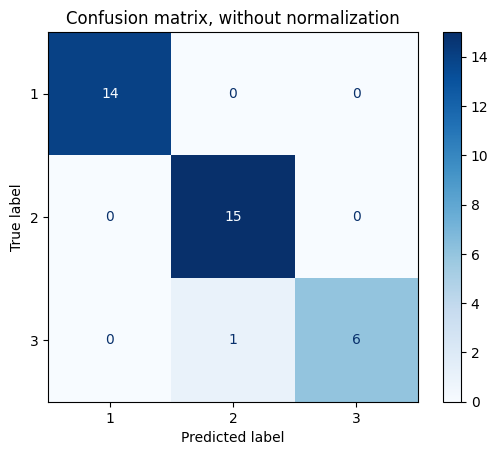

In [32]:
titles_options = [
    ("Confusion matrix, without normalization", None)
]
class_names = y.unique()

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Ejercicio 4

El archivo Balance.csv tiene información sobre un experimento psicológico realizado para evaluar el aprendizaje en los niños. Cada fila de la tabla tiene las características de una balanza, referidas a la longitud de los brazos izquierdo y derecho de la balanza y al peso que hay en cada brazo, y un atributo que indica si la balanza se inclina al lado izquierdo (L), derecho (R), o está balanceada (B).

Utilice una parte de los ejemplos para entrenar un multiperceptrón que sea capaz que predecir si la balanza está inclinada a derecha, a izquierda o si está balanceada. Analice la precisión de la red sobre los ejemplos de entrenamiento y sobre los de testeo.

Fuente: Balance Scale Data Set - https://archive.ics.uci.edu/ml/datasets/Balance+Scale

In [36]:
balance = pd.read_csv('/content/drive/MyDrive/DeepLearning-colab/Datos-20240901/Balance.csv')

In [37]:
balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Balance      625 non-null    object
 1   LeftWeight   625 non-null    int64 
 2   LeftDist     625 non-null    int64 
 3   RightWeight  625 non-null    int64 
 4   RightDist    625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [39]:
balance.isnull().sum()

,0
Balance,0
LeftWeight,0
LeftDist,0
RightWeight,0
RightDist,0


<Axes: >

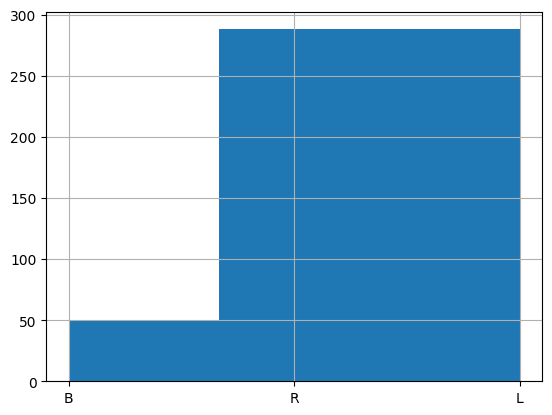

In [67]:
balance.Balance.hist(bins=3)

In [69]:
# Separación de datos
target = 'Balance'

X = balance.drop(columns=target)
y = balance[target]

# Binarizador para convertir el nombre de la clase en one hot encoding
binarizer = preprocessing.LabelBinarizer()
y = binarizer.fit_transform(y)

# Entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)

In [70]:
# Normalizar
X_train = normalizador.fit_transform(X_train)
X_test = normalizador.transform(X_test)

In [77]:
# Hiperparams
alfa = 0.005
iter = 2500
cota = 1e-5
activation_fun = 'tanh'
solver = 'sgd'
ocultas = 8

classifier = MLPClassifier(solver = solver,
                           max_iter = iter,
                           hidden_layer_sizes=(ocultas),
                           tol = cota,
                           activation = activation_fun,
                           learning_rate_init = alfa).fit(X_train, y_train)

# Softmax en la capa de salida
classifier.out_activation_ = 'softmax'

# Medir el entrenamiento
y_pred = classifier.predict(X_train)
score = classifier.score(X_train, y_train)

# 'Desbinarizar' para poder ver las clases
y_inv = binarizer.inverse_transform(y_train)
y_pred_inv = binarizer.inverse_transform(y_pred)

# Cálculo accuracy:

efectividad = 100*(y_pred_inv == y_inv).sum() / len(y_inv)
score = classifier.score(X_train, y_train)

print(f'Efectividad: {efectividad}')
print(f'Score: {score}')

Efectividad: 98.0
Score: 0.978


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [78]:
# Medir el testeo
y_pred = classifier.predict(X_test)
score = classifier.score(X_test, y_test)

# 'Desbinarizar' para poder ver las clases
y_inv = binarizer.inverse_transform(y_test)
y_pred_inv = binarizer.inverse_transform(y_pred)

# Cálculo accuracy:

efectividad = 100*(y_pred_inv == y_inv).sum() / len(y_inv)
score = classifier.score(X_test, y_test)

print(f'Efectividad: {efectividad}')
print(f'Score: {score}')

Efectividad: 97.6
Score: 0.968


# Ejercicio 5

El archivo ZOO.csv contiene información de 101 animales caracterizados por los siguientes atributos:

1. Nombre del animal
2. Tiene Pelo
3. Plumas
4. Huevos
5. Leche
6. Vuela
7. Acuático
8. Depredador
9. Dentado
10. Vertebrado
11. Branquias
12. Venenoso
13. Aletas
14. Patas
15. Cola
16. Domestico
17. Tamaño gato
18. Clase

Salvo los atributos 1 y 18 que contienen texto y el 14 que contiene el número de patas del animal, el resto toma el valor 1 si el animal posee la característica y 0 si no. Hay 7 valores de clase posible (atributo 18):
mamífero, ave, pez, invertebrado, insecto, reptil y anfibio.

Entrene un multiperceptrón que sea capaz de clasificar un animal en una de las 7 clases. Utilice el 70% de los ejemplos para entrenar y el 30% para realizar el testeo. Realice al menos 10 ejecuciones independientes de la configuración seleccionada para respaldar sus afirmaciones referidas a la performance del modelo.

Fuente de Datos: Zoo Data Set - https://archive.ics.uci.edu/ml/datasets/zoo

In [87]:
url = '/content/drive/MyDrive/DeepLearning-colab/Datos-20240901/zoo.csv'
with open(url, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

zoo_df = pd.read_csv(url, encoding=result['encoding'])

In [88]:
zoo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   animal         101 non-null    object
 1   Tiene_Pelo     101 non-null    int64 
 2   Tiene_Plumas   101 non-null    int64 
 3   Nace_de_huevo  101 non-null    int64 
 4   Toma_Leche     101 non-null    int64 
 5   Vuela          101 non-null    int64 
 6   Acuatico       101 non-null    int64 
 7   Depredador     101 non-null    int64 
 8   Dentado        101 non-null    int64 
 9   Vertebrado     101 non-null    int64 
 10  Respira        101 non-null    int64 
 11  Venenoso       101 non-null    int64 
 12  Tiene_Aletas   101 non-null    int64 
 13  Cant_Patas     101 non-null    int64 
 14  Tiene_Cola     101 non-null    int64 
 15  Domestico      101 non-null    int64 
 16  Tamano_Gato    101 non-null    int64 
 17  Clase          101 non-null    object
dtypes: int64(16), object(2)
memory

In [90]:
zoo = zoo_df.drop(columns= 'animal')
zoo.columns

Index(['Tiene_Pelo', 'Tiene_Plumas', 'Nace_de_huevo', 'Toma_Leche', 'Vuela',
       'Acuatico', 'Depredador', 'Dentado', 'Vertebrado', 'Respira',
       'Venenoso', 'Tiene_Aletas', 'Cant_Patas', 'Tiene_Cola', 'Domestico',
       'Tamano_Gato', 'Clase'],
      dtype='object')

<Axes: >

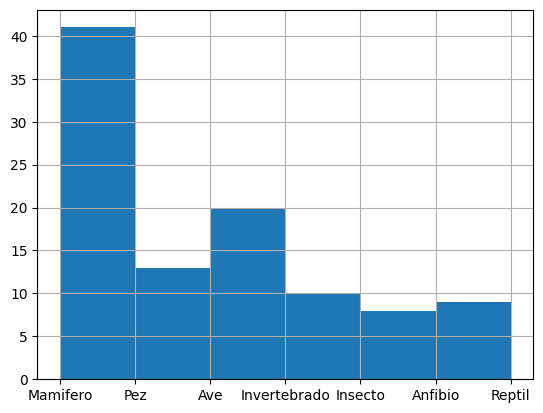

In [150]:
zoo.Clase.hist(bins=zoo.Clase.unique())

In [93]:
# Separar datos
target = 'Clase'

X = zoo.drop(columns=target)
y = zoo[target]

# Binarizar la etiqueta
y = binarizer.fit_transform(y)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [94]:
# Normalizar
X_train = normalizador.fit_transform(X_train)
X_test = normalizador.transform(X_test)

In [147]:
# Hiperparams y modelo
alfa = 0.001
iter =5000
cota = 1e-7
activation_fun = 'tanh'
solver = 'sgd'
ocultas = 5

modelo_5 = MLPClassifier(solver=solver,
                         learning_rate_init=alfa,
                         max_iter=iter,
                         tol=cota,
                         activation=activation_fun,
                         hidden_layer_sizes=(ocultas),
                         verbose=False).fit(X_train,y_train)

modelo_5.out_activation= 'softmax'


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [148]:
# Medir entrenamiento y test
y_it_train = binarizer.inverse_transform(y_train)
y_it_test = binarizer.inverse_transform(y_test)

total_score_train = 0
total_score_test = 0

efectividad_train = 0
efectividad_test = 0

for i in range(10):
  total_score_train += modelo_5.score(X_train, y_train)
  total_score_test += modelo_5.score(X_test, y_test)

  # efectividad
  y_pred_train = modelo_5.predict(X_train)
  y_pred_test = modelo_5.predict(X_test)

  y_pred_test_it = binarizer.inverse_transform(y_pred_test)
  y_pred_train_it = binarizer.inverse_transform(y_pred_train)

  efectividad_train += 100*(y_pred_train_it == y_it_train).sum() / len(y_it_train)
  efectividad_test += 100*(y_pred_test_it == y_it_test).sum() / len(y_it_test)

print('**** Promedios de 10 iteraciones: *****')
print(f'Efectividad train: {efectividad_train/10}')
print(f'Train score_train: {total_score_train/10}')
print('-'*40)
print(f'Efectividad test: {efectividad_test/10}')
print(f'Train score_test: {total_score_test/10}')

**** Promedios de 10 iteraciones: *****
Efectividad train: 97.14285714285712
Train score_train: 0.9428571428571428
----------------------------------------
Efectividad test: 87.0967741935484
Train score_test: 0.8064516129032258


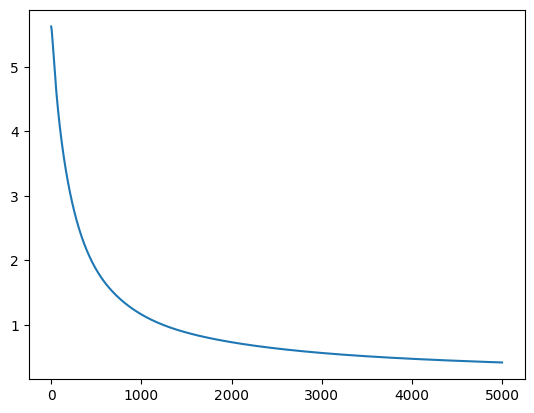

In [149]:
plt.plot(modelo_5.loss_curve_)

# Ejercicio 6

Los archivos Segment_Train.csv y Segment_Test.csv contienen información referida a regiones de 3x3 pixeles pertenecientes a 7 imágenes distintas. Cada una corresponde a uno de los siguientes tipos de superficie: ladrillo, cielo, follaje, cemento, ventana, camino y pasto.

Cada región de 3x3 ha sido caracterizada por 19 atributos numéricos:
1. region-centroid-col: la columna del pixel central de la región.
2. region-centroid-row: la fila del pixel central de la región.
3. region-pixel-count: el número de pixeles de la región = 9.
4. short-line-density-5: el resultado de un algoritmo de extracción de líneas que cuenta la cantidad de líneas de bajo contraste que atraviesan la región.
5. short-line-density-2: ídem anterior para líneas de alto contraste.
6. vedge-mean: medida del contraste entre pixeles adyacentes. Este atributo contiene el valor promedio y el siguiente la desviación. Estas medidas sirven para detectar la presencia de un eje vertical.
7. vegde-sd: (ver 6)
8. hedge-mean: ídem 6 para eje horizontal. Contiene el valor medio y el siguiente la desviación.
9. hedge-sd: (ver 8).
10. intensity-mean: El promedio calculado sobre la región de la forma (R + G + B)/3
11. rawred-mean: el promedio sobre la región de los valores R.
12. rawblue-mean: el promedio sobre la región de los valores B.
13. rawgreen-mean: el promedio sobre la región de los valores G.
14. exred-mean: Medida de exceso de color rojo: (2R - (G + B))
15. exblue-mean: Medida de exceso de color azul: (2B - (G + R))
16. exgreen-mean: Medida de exceso de color verde: (2G - (R + B))
17. value-mean: Transformación no lineal 3D de RGB.
18. saturatoin-mean: (ver 17)
19. hue-mean: ver 17)

El atributo 20 corresponde al número de imagen de la cual fue extraída la región de 3x3. Sus valores son:

1 (ladrillo), 2 (cemento), 3(follaje), 4 (pasto), 5 (camino), 6 (cielo), 7 (ventana).

Entrene una red neuronal multiperceptrón para que dada una región de 3x3, representada a través de los 19 atributos indicados anteriormente, sea capaz de identificar a cuál de las 7 imágenes corresponde.

Utilice los ejemplos del archivo Segment_Train.csv para entrenar y los del archivo Segment_Test.csv para realizar el testeo.

Realice al menos 10 ejecuciones independientes de la configuración seleccionada para respaldar sus afirmaciones referidas a la performance del modelo.
Fuente: Image Segmentation Data Set: https://archive.ics.uci.edu/ml/datasets/Image+Segmentation

In [201]:
segment_train = pd.read_csv('/content/drive/MyDrive/DeepLearning-colab/Datos-20240901/Segment_Train.csv')
segment_test = pd.read_csv('/content/drive/MyDrive/DeepLearning-colab/Datos-20240901/Segment_Test.csv')

In [202]:
segment_train.head()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
GRASS,110.0,189.0,9,0.0,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
GRASS,86.0,187.0,9,0.0,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
GRASS,225.0,244.0,9,0.0,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
GRASS,47.0,232.0,9,0.0,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
GRASS,97.0,186.0,9,0.0,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654


In [198]:
segment_train.index

Index(['GRASS', 'GRASS', 'GRASS', 'GRASS', 'GRASS', 'GRASS', 'GRASS', 'GRASS',
       'GRASS', 'GRASS',
       ...
       'WINDOW', 'WINDOW', 'WINDOW', 'CEMENT', 'CEMENT', 'CEMENT', 'CEMENT',
       'CEMENT', 'CEMENT', 'CEMENT'],
      dtype='object', length=2100)

In [191]:
segment_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2100 entries, GRASS to CEMENT
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   REGION-CENTROID-COL   2100 non-null   float64
 1   REGION-CENTROID-ROW   2100 non-null   float64
 2   REGION-PIXEL-COUNT    2100 non-null   int64  
 3   SHORT-LINE-DENSITY-5  2100 non-null   float64
 4   SHORT-LINE-DENSITY-2  2100 non-null   float64
 5   VEDGE-MEAN            2100 non-null   float64
 6   VEDGE-SD              2100 non-null   float64
 7   HEDGE-MEAN            2100 non-null   float64
 8   HEDGE-SD              2100 non-null   float64
 9   INTENSITY-MEAN        2100 non-null   float64
 10  RAWRED-MEAN           2100 non-null   float64
 11  RAWBLUE-MEAN          2100 non-null   float64
 12  RAWGREEN-MEAN         2100 non-null   float64
 13  EXRED-MEAN            2100 non-null   float64
 14  EXBLUE-MEAN           2100 non-null   float64
 15  EXGREEN-MEAN        

In [203]:
segment_train['CLASS'] = segment_train.index
segment_test['CLASS'] = segment_test.index

In [205]:
segment_train = segment_train.reset_index(drop=True)
segment_test = segment_test.reset_index(drop=True)

In [206]:
segment_test.head()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN,CLASS
0,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818,BRICKFACE
1,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817,BRICKFACE
2,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946,BRICKFACE
3,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272,BRICKFACE
4,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773,BRICKFACE


In [210]:
# Separar datos de entrenamiento
target = 'CLASS'
X_train = segment_train.drop(columns=target)
y_train = segment_train[target]

y_train = binarizer.fit_transform(y_train)

# Seprar datos de test
X_test = segment_test.drop(columns=target)
y_test = segment_test[target]

y_test = binarizer.fit_transform(y_test)

In [211]:
# normalizar
X_train = normalizador.fit_transform(X_train)
X_test = normalizador.transform(X_test)

In [227]:
# hiperparams y modelo
alfa = 0.01
iter = 5000
cota = 1e-7
activation_fun = 'tanh'
solver = 'sgd'

neuronas = [10,11,12,13]
for n in neuronas:
  print(f'Neuronas ocultas {n}')
  total_train = 0
  total_test = 0
  for i in range(10):
    modelo_6 = MLPClassifier(solver=solver,
                            learning_rate_init=alfa,
                            max_iter=iter,
                            tol=cota,
                            activation=activation_fun,
                            hidden_layer_sizes=(n),
                            verbose=False).fit(X_train,y_train)

    modelo_6.out_activation= 'softmax'
    train = modelo_6.score(X_train, y_train)
    test = modelo_6.score(X_test, y_test)
    total_train += train
    total_test += test
    print(f'iteración: {i} \nScore train: {train} \nScore test: {test}')
    print('-'*30)
  print(f'Promedio test: {total_test/10} \nPromedio train: {total_train/10}')
  print('*'*40)


Neuronas ocultas 10
iteración: 0 
Score train: 0.9561904761904761 
Score test: 0.9380952380952381
------------------------------
iteración: 1 
Score train: 0.9685714285714285 
Score test: 0.9666666666666667
------------------------------
iteración: 2 
Score train: 0.9657142857142857 
Score test: 0.9571428571428572
------------------------------
iteración: 3 
Score train: 0.9723809523809523 
Score test: 0.9571428571428572
------------------------------
iteración: 4 
Score train: 0.9661904761904762 
Score test: 0.9571428571428572
------------------------------
iteración: 5 
Score train: 0.9661904761904762 
Score test: 0.9571428571428572
------------------------------
iteración: 6 
Score train: 0.9709523809523809 
Score test: 0.9523809523809523
------------------------------
iteración: 7 
Score train: 0.9619047619047619 
Score test: 0.9571428571428572
------------------------------
iteración: 8 
Score train: 0.969047619047619 
Score test: 0.9619047619047619
------------------------------
